## Assignment for Week 5 - Neural Network

### Project:
#### Neural Networks
Credit Card Fraud data: https://www.kaggle.com/mlg-ulb/creditcardfraud/

- Make at least 2 EDA plots – histograms, correlation plots (df.corr() in python/pandas, and seaborn’s heatmap can plot it), scatter/line plots, etc.
- Use a neural net to predict if a transaction is fraud or not (you will have to change the loss function from mse/mae to something for binary classification)
- Plot the training and validation loss
- Report the performance on the training and test set with accuracy and confusion matrices
- Write some interpretation of all your results/plots

### Deliverables:

Upload your notebook's .ipynb file. 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

## Introduction
***

In this weeks project we will be using neural networks on the [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud/) dataset. I am planning to use keras for our model creation of our neural network, and using the resulting models to predict the class of our credit card transactions as fraud or legitimate.

### Setup

In [1]:
# Utilities
import pandas as pd
import numpy as np

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Sklearn Neural Networks
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
!head creditcard.csv

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.4639170410

In [3]:
credit_df = pd.read_csv('creditcard.csv')
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
counts = credit_df['Class'].value_counts()
counts[1]/counts[0]*100

0.17304750013189596

It looks like we have a heavily imbalanced set here, so we will have to look at ways of addressing our sampling or our ML algorithms will just show every transaction as not fraudulent.

### EDA

<AxesSubplot:>

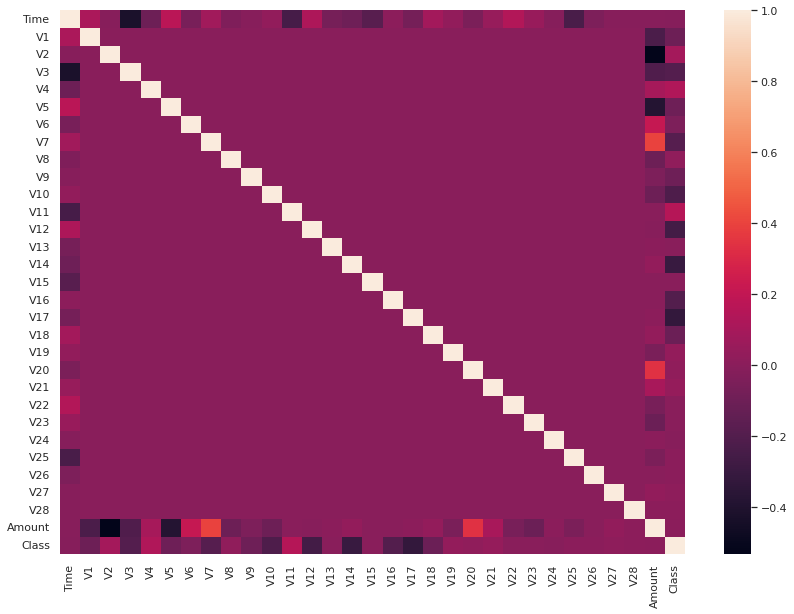

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(credit_df.corr())

This lines up with what we saw earlier with the dataset being unbalanced. Almost everything sits at zero because of the small number of frauds detected.

In [9]:
def split_df(df, col, value):
    res1 = df[df[col] == value]
    res2 = df[df[col] != value]
    return res1, res2

<AxesSubplot:xlabel='Time', ylabel='Density'>

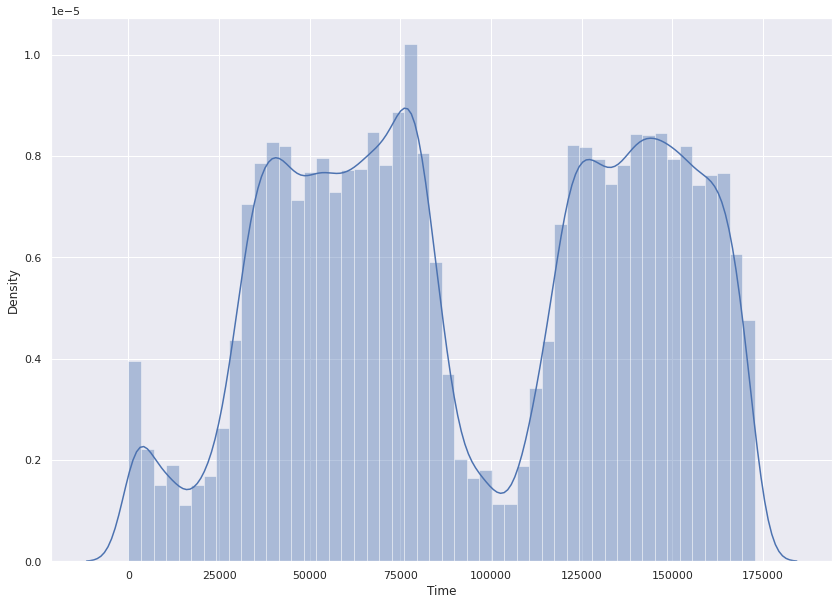

In [10]:
plt.figure(figsize=(14,10))
sns.distplot(credit_df['Time'])

In [11]:
# Splitting out fraud and regular transactions to compare their charts
fraud_df, regular_df = split_df(credit_df, 'Class', 1)

<AxesSubplot:title={'center':'Regular Time Distribution (Seconds)'}, xlabel='Time', ylabel='Density'>

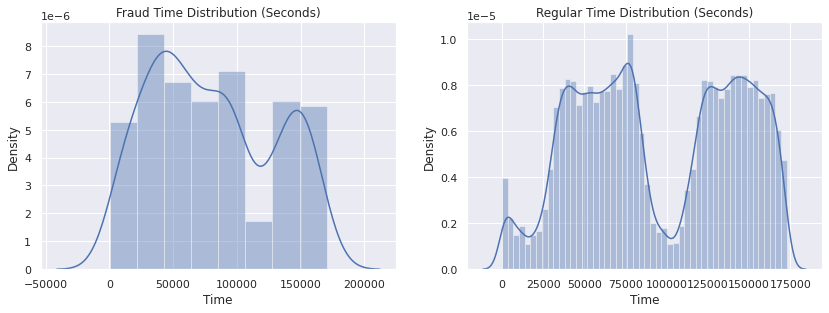

In [12]:
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Fraud Time Distribution (Seconds)')
sns.distplot(fraud_df['Time'])

plt.subplot(2, 2, 2)
plt.title('Regular Time Distribution (Seconds)')
sns.distplot(regular_df['Time'])

At this point it is hard to say what Time actually is here and at a minimum it doesn't have a clear difference between our fraud and no fraud cases. I believe at this point we should drop this column.

In [13]:
credit_df.drop(columns=['Time'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<AxesSubplot:xlabel='Amount', ylabel='Density'>

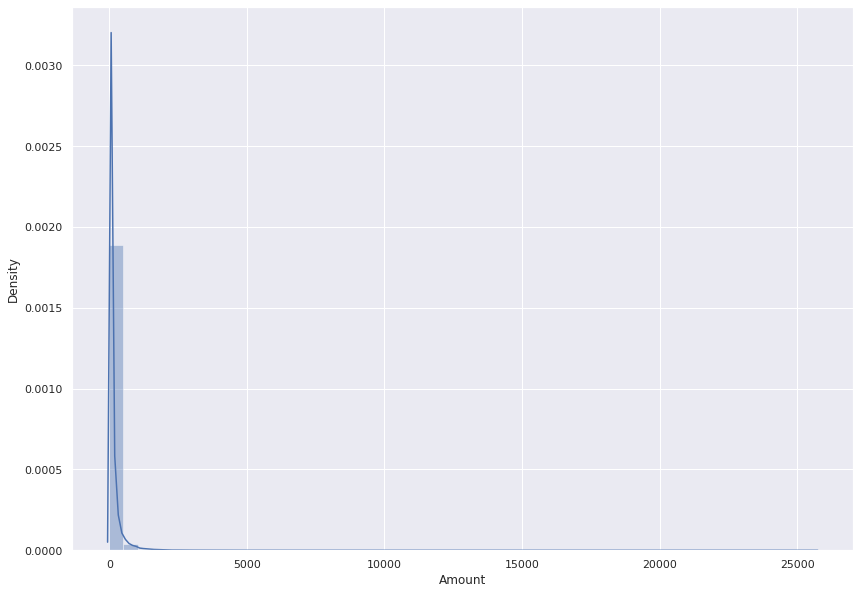

In [14]:
plt.figure(figsize=(14,10))
sns.distplot(credit_df['Amount'])

<AxesSubplot:title={'center':'Regular Distribution Amount'}, xlabel='Amount', ylabel='Density'>

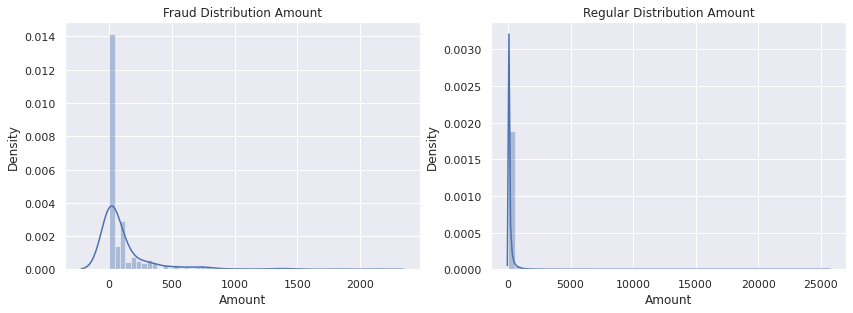

In [15]:
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Fraud Distribution Amount')
sns.distplot(fraud_df['Amount'])

plt.subplot(2, 2, 2)
plt.title('Regular Distribution Amount')
sns.distplot(regular_df['Amount'])

It looks like our amount column has right skew and might be better off being mapped to a log scale. I am going to leave it as it is for now, but we can come back to this if there are issues finding signal with our model.

### Neural Network

Intro - Plan of attack.

In [16]:
cols = credit_df.columns

prediction_col = 'Class'
feature_cols = [c for c in cols if c != prediction_col]

x = credit_df[feature_cols]
y = credit_df[prediction_col]

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
# Fit scaler only using training data so that there is no peeking into other sets
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# Setup model constants
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 2048
EPOCHS = 150

early_stopping = keras.callbacks.EarlyStopping(
    monitor='prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [19]:
METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR')
]

2022-06-05 16:04:19.618762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-05 16:04:19.643341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-06-05 16:04:19.643358: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-05 16:04:19.644329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [20]:
# Setup function for building our keras ANN
def build_model(metrics=METRICS, output_bias=None):
    # For adjusting bias in further iterations
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    
    # This is the general model design Dense -> Batch -> Dropout -> Dense sigmoid output
    model = Sequential([
        Dense(32, activation='relu', input_shape=(x_train.shape[-1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid', bias_initializer=output_bias),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [21]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [22]:
# Experimented on validation split, epochs, and batch size
m_fit = model.fit(
    x_train, y_train, 
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/150
90/90 [==============================] - 2s 12ms/step - loss: 0.2729 - fn: 239.0000 - fp: 12173.0000 - tn: 169794.0000 - tp: 70.0000 - precision: 0.0057 - recall: 0.2265 - auc: 0.4238 - prc: 0.0192 - val_loss: 0.1419 - val_fn: 51.0000 - val_fp: 9.0000 - val_tn: 45475.0000 - val_tp: 34.0000 - val_precision: 0.7907 - val_recall: 0.4000 - val_auc: 0.8739 - val_prc: 0.6104
Epoch 2/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1516 - fn: 217.0000 - fp: 1737.0000 - tn: 180230.0000 - tp: 92.0000 - precision: 0.0503 - recall: 0.2977 - auc: 0.5692 - prc: 0.0736 - val_loss: 0.1014 - val_fn: 33.0000 - val_fp: 9.0000 - val_tn: 45475.0000 - val_tp: 52.0000 - val_precision: 0.8525 - val_recall: 0.6118 - val_auc: 0.8949 - val_prc: 0.6267
Epoch 3/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0974 - fn: 195.0000 - fp: 673.0000 - tn: 181294.0000 - tp: 114.0000 - precision: 0.1449 - recall: 0.3689 - auc: 0.6139 - prc: 0.1526 - val_loss: 0.0639 - val_f

90/90 [==============================] - 1s 6ms/step - loss: 0.0065 - fn: 153.0000 - fp: 25.0000 - tn: 181942.0000 - tp: 156.0000 - precision: 0.8619 - recall: 0.5049 - auc: 0.8959 - prc: 0.6000 - val_loss: 0.0050 - val_fn: 30.0000 - val_fp: 9.0000 - val_tn: 45475.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.6471 - val_auc: 0.9351 - val_prc: 0.7207
Epoch 23/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0070 - fn: 157.0000 - fp: 30.0000 - tn: 181937.0000 - tp: 152.0000 - precision: 0.8352 - recall: 0.4919 - auc: 0.8918 - prc: 0.5516 - val_loss: 0.0048 - val_fn: 31.0000 - val_fp: 9.0000 - val_tn: 45475.0000 - val_tp: 54.0000 - val_precision: 0.8571 - val_recall: 0.6353 - val_auc: 0.9351 - val_prc: 0.7138
Epoch 24/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0064 - fn: 162.0000 - fp: 30.0000 - tn: 181937.0000 - tp: 147.0000 - precision: 0.8305 - recall: 0.4757 - auc: 0.8996 - prc: 0.5902 - val_loss: 0.0048 - val_fn: 28.0000 - va

90/90 [==============================] - 1s 6ms/step - loss: 0.0052 - fn: 138.0000 - fp: 35.0000 - tn: 181932.0000 - tp: 171.0000 - precision: 0.8301 - recall: 0.5534 - auc: 0.9299 - prc: 0.6554 - val_loss: 0.0037 - val_fn: 32.0000 - val_fp: 8.0000 - val_tn: 45476.0000 - val_tp: 53.0000 - val_precision: 0.8689 - val_recall: 0.6235 - val_auc: 0.9525 - val_prc: 0.7501
Epoch 44/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0046 - fn: 132.0000 - fp: 29.0000 - tn: 181938.0000 - tp: 177.0000 - precision: 0.8592 - recall: 0.5728 - auc: 0.9367 - prc: 0.6941 - val_loss: 0.0036 - val_fn: 31.0000 - val_fp: 8.0000 - val_tn: 45476.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.6353 - val_auc: 0.9525 - val_prc: 0.7533
Epoch 45/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0048 - fn: 140.0000 - fp: 27.0000 - tn: 181940.0000 - tp: 169.0000 - precision: 0.8622 - recall: 0.5469 - auc: 0.9240 - prc: 0.6841 - val_loss: 0.0036 - val_fn: 29.0000 - va

90/90 [==============================] - 1s 6ms/step - loss: 0.0039 - fn: 116.0000 - fp: 30.0000 - tn: 181937.0000 - tp: 193.0000 - precision: 0.8655 - recall: 0.6246 - auc: 0.9347 - prc: 0.7317 - val_loss: 0.0032 - val_fn: 19.0000 - val_fp: 10.0000 - val_tn: 45474.0000 - val_tp: 66.0000 - val_precision: 0.8684 - val_recall: 0.7765 - val_auc: 0.9526 - val_prc: 0.7787
Epoch 65/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0042 - fn: 117.0000 - fp: 32.0000 - tn: 181935.0000 - tp: 192.0000 - precision: 0.8571 - recall: 0.6214 - auc: 0.9315 - prc: 0.7144 - val_loss: 0.0032 - val_fn: 27.0000 - val_fp: 9.0000 - val_tn: 45475.0000 - val_tp: 58.0000 - val_precision: 0.8657 - val_recall: 0.6824 - val_auc: 0.9526 - val_prc: 0.7797
Epoch 66/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0038 - fn: 118.0000 - fp: 23.0000 - tn: 181944.0000 - tp: 191.0000 - precision: 0.8925 - recall: 0.6181 - auc: 0.9335 - prc: 0.7493 - val_loss: 0.0032 - val_fn: 19.0000 - v

90/90 [==============================] - 0s 5ms/step - loss: 0.0035 - fn: 104.0000 - fp: 29.0000 - tn: 181938.0000 - tp: 205.0000 - precision: 0.8761 - recall: 0.6634 - auc: 0.9531 - prc: 0.7588 - val_loss: 0.0029 - val_fn: 18.0000 - val_fp: 12.0000 - val_tn: 45472.0000 - val_tp: 67.0000 - val_precision: 0.8481 - val_recall: 0.7882 - val_auc: 0.9526 - val_prc: 0.8182
Epoch 86/150
90/90 [==============================] - 0s 6ms/step - loss: 0.0034 - fn: 103.0000 - fp: 27.0000 - tn: 181940.0000 - tp: 206.0000 - precision: 0.8841 - recall: 0.6667 - auc: 0.9434 - prc: 0.7653 - val_loss: 0.0029 - val_fn: 18.0000 - val_fp: 12.0000 - val_tn: 45472.0000 - val_tp: 67.0000 - val_precision: 0.8481 - val_recall: 0.7882 - val_auc: 0.9527 - val_prc: 0.8224
Epoch 87/150
90/90 [==============================] - 0s 5ms/step - loss: 0.0035 - fn: 112.0000 - fp: 28.0000 - tn: 181939.0000 - tp: 197.0000 - precision: 0.8756 - recall: 0.6375 - auc: 0.9500 - prc: 0.7541 - val_loss: 0.0030 - val_fn: 20.0000 - 

In [23]:
# Function for reporting the training and test metrics after fitting our ANN
def show_score(m):
    train_score = m.evaluate(x_train, y_train)
    test_score = m.evaluate(x_test, y_test)
    y_pred_train = m.predict(x_train)
    y_pred_test = m.predict(x_test)
    
    print('\nTraining Metrics')
    print('============================================')
    for name, value in zip(m.metrics_names, train_score):
        print(f'{name} : {value:.4f}')
    print('\nTraining Confusion Matrix')
    print('============================================')
    print(confusion_matrix(y_train, y_pred_train.round()))
    print('\nTraining Classification Report')
    print('============================================')
    print(classification_report(y_train, y_pred_train.round()))    
    
    print('\nTest Metrics')
    print('============================================')
    for name, value in zip(m.metrics_names, test_score):
        print(f'{name} : {value:.4f}')
    print('\nTest Confusion Matrix')
    print('============================================')
    print(confusion_matrix(y_test, y_pred_test.round()))
    print('\nTest Classification Report')
    print('============================================')
    print(classification_report(y_test, y_pred_test.round())) 

In [24]:
show_score(model)

1781/1781 [==============================] - 1s 697us/step

Training Metrics
loss : 0.0027
fn : 82.0000
fp : 43.0000
tn : 227408.0000
tp : 312.0000
precision : 0.8789
recall : 0.7919
auc : 0.9476
prc : 0.8019

Training Confusion Matrix
[[227408     43]
 [    82    312]]

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.79      0.83       394

    accuracy                           1.00    227845
   macro avg       0.94      0.90      0.92    227845
weighted avg       1.00      1.00      1.00    227845


Test Metrics
loss : 0.0032
fn : 25.0000
fp : 11.0000
tn : 56853.0000
tp : 73.0000
precision : 0.8690
recall : 0.7449
auc : 0.9486
prc : 0.7829

Test Confusion Matrix
[[56853    11]
 [   25    73]]

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.74  

Words

In [25]:
# Function for plotting the relevant training improvements over the ANN epochs
def show_training(hist):
    plt.figure(figsize=(12, 16))

    plt.subplot(4, 2, 1)
    plt.plot(hist.history['loss'], label='Loss')
    plt.plot(hist.history['val_loss'], label='val_Loss')
    plt.title('Loss Function evolution during training')
    plt.legend()

    plt.subplot(4, 2, 2)
    plt.plot(hist.history['fn'], label='fn')
    plt.plot(hist.history['val_fn'], label='val_fn')
    plt.title('FN Accuracy evolution during training')
    plt.legend()

    plt.subplot(4, 2, 3)
    plt.plot(hist.history['precision'], label='precision')
    plt.plot(hist.history['val_precision'], label='val_precision')
    plt.title('Precision evolution during training')
    plt.legend()

    plt.subplot(4, 2, 4)
    plt.plot(hist.history['recall'], label='recall')
    plt.plot(hist.history['val_recall'], label='val_recall')
    plt.title('Recall evolution during training')
    plt.legend()

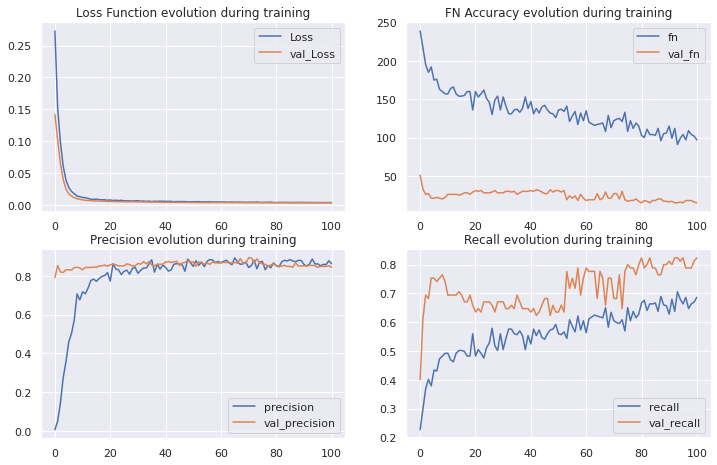

In [26]:
show_training(m_fit)

### Can we improve our model?

At this point I do not think we have completely addressed our imbalanced data problem, although we have created an NN with sufficient nodes to improve our f1 score and make a fairly good confusion matrix. I want to see if there are other improvements that we can make, either to the structure of the NN or by manipulating the data. We can also tune our metrics a little bit differently, since it would make sense that accepting a few more false positives to remove some false negatives would be a good tradeoff to make with this model.

**Set initial bias**

In [27]:
# Adding output bias to our model
neg, pos = np.bincount(credit_df['Class'])
total = neg + pos
print(f'Examples:\n    Total: {total}\n    Positive: {pos} ({100 * pos / total:.2f}% of total)\n')

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [28]:
initial_bias = np.log([pos/neg])

In [29]:
fixed_bias_model = build_model(output_bias=initial_bias)

In [30]:
bias_fit = model.fit(
    x_train, y_train,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0038 - fn: 113.0000 - fp: 33.0000 - tn: 181934.0000 - tp: 196.0000 - precision: 0.8559 - recall: 0.6343 - auc: 0.9500 - prc: 0.7305 - val_loss: 0.0030 - val_fn: 20.0000 - val_fp: 12.0000 - val_tn: 45472.0000 - val_tp: 65.0000 - val_precision: 0.8442 - val_recall: 0.7647 - val_auc: 0.9526 - val_prc: 0.8158
Epoch 2/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0039 - fn: 114.0000 - fp: 29.0000 - tn: 181938.0000 - tp: 195.0000 - precision: 0.8705 - recall: 0.6311 - auc: 0.9418 - prc: 0.7301 - val_loss: 0.0030 - val_fn: 18.0000 - val_fp: 12.0000 - val_tn: 45472.0000 - val_tp: 67.0000 - val_precision: 0.8481 - val_recall: 0.7882 - val_auc: 0.9526 - val_prc: 0.8044
Epoch 3/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0035 - fn: 109.0000 - fp: 32.0000 - tn: 181935.0000 - tp: 200.0000 - precision: 0.8621 - recall: 0.6472 - auc: 0.9418 - prc: 0.7548 - val_loss: 0.0030 - val_fn: 

90/90 [==============================] - 1s 6ms/step - loss: 0.0033 - fn: 104.0000 - fp: 29.0000 - tn: 181938.0000 - tp: 205.0000 - precision: 0.8761 - recall: 0.6634 - auc: 0.9456 - prc: 0.7725 - val_loss: 0.0029 - val_fn: 15.0000 - val_fp: 13.0000 - val_tn: 45471.0000 - val_tp: 70.0000 - val_precision: 0.8434 - val_recall: 0.8235 - val_auc: 0.9527 - val_prc: 0.8334
Epoch 23/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0034 - fn: 100.0000 - fp: 45.0000 - tn: 181922.0000 - tp: 209.0000 - precision: 0.8228 - recall: 0.6764 - auc: 0.9453 - prc: 0.7604 - val_loss: 0.0028 - val_fn: 15.0000 - val_fp: 13.0000 - val_tn: 45471.0000 - val_tp: 70.0000 - val_precision: 0.8434 - val_recall: 0.8235 - val_auc: 0.9527 - val_prc: 0.8389
Epoch 24/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0033 - fn: 110.0000 - fp: 39.0000 - tn: 181928.0000 - tp: 199.0000 - precision: 0.8361 - recall: 0.6440 - auc: 0.9550 - prc: 0.7566 - val_loss: 0.0029 - val_fn: 15.0000 - 

90/90 [==============================] - 0s 6ms/step - loss: 0.0030 - fn: 87.0000 - fp: 35.0000 - tn: 181932.0000 - tp: 222.0000 - precision: 0.8638 - recall: 0.7184 - auc: 0.9503 - prc: 0.7800 - val_loss: 0.0029 - val_fn: 15.0000 - val_fp: 13.0000 - val_tn: 45471.0000 - val_tp: 70.0000 - val_precision: 0.8434 - val_recall: 0.8235 - val_auc: 0.9527 - val_prc: 0.8456
Epoch 44/150
90/90 [==============================] - 0s 5ms/step - loss: 0.0031 - fn: 95.0000 - fp: 41.0000 - tn: 181926.0000 - tp: 214.0000 - precision: 0.8392 - recall: 0.6926 - auc: 0.9503 - prc: 0.7810 - val_loss: 0.0029 - val_fn: 16.0000 - val_fp: 12.0000 - val_tn: 45472.0000 - val_tp: 69.0000 - val_precision: 0.8519 - val_recall: 0.8118 - val_auc: 0.9527 - val_prc: 0.8510
Epoch 45/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0028 - fn: 89.0000 - fp: 31.0000 - tn: 181936.0000 - tp: 220.0000 - precision: 0.8765 - recall: 0.7120 - auc: 0.9601 - prc: 0.7944 - val_loss: 0.0029 - val_fn: 16.0000 - val

90/90 [==============================] - 1s 6ms/step - loss: 0.0028 - fn: 90.0000 - fp: 34.0000 - tn: 181933.0000 - tp: 219.0000 - precision: 0.8656 - recall: 0.7087 - auc: 0.9634 - prc: 0.8078 - val_loss: 0.0029 - val_fn: 15.0000 - val_fp: 13.0000 - val_tn: 45471.0000 - val_tp: 70.0000 - val_precision: 0.8434 - val_recall: 0.8235 - val_auc: 0.9528 - val_prc: 0.8658
Epoch 65/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0027 - fn: 86.0000 - fp: 30.0000 - tn: 181937.0000 - tp: 223.0000 - precision: 0.8814 - recall: 0.7217 - auc: 0.9650 - prc: 0.8123 - val_loss: 0.0029 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 45470.0000 - val_tp: 71.0000 - val_precision: 0.8353 - val_recall: 0.8353 - val_auc: 0.9587 - val_prc: 0.8690
Epoch 66/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0028 - fn: 87.0000 - fp: 36.0000 - tn: 181931.0000 - tp: 222.0000 - precision: 0.8605 - recall: 0.7184 - auc: 0.9554 - prc: 0.8114 - val_loss: 0.0030 - val_fn: 15.0000 - val

90/90 [==============================] - 1s 6ms/step - loss: 0.0025 - fn: 82.0000 - fp: 32.0000 - tn: 181935.0000 - tp: 227.0000 - precision: 0.8764 - recall: 0.7346 - auc: 0.9684 - prc: 0.8251 - val_loss: 0.0030 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 45470.0000 - val_tp: 71.0000 - val_precision: 0.8353 - val_recall: 0.8353 - val_auc: 0.9528 - val_prc: 0.8649
Epoch 86/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0025 - fn: 80.0000 - fp: 28.0000 - tn: 181939.0000 - tp: 229.0000 - precision: 0.8911 - recall: 0.7411 - auc: 0.9621 - prc: 0.8376 - val_loss: 0.0030 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 45470.0000 - val_tp: 71.0000 - val_precision: 0.8353 - val_recall: 0.8353 - val_auc: 0.9528 - val_prc: 0.8682
Epoch 87/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0025 - fn: 72.0000 - fp: 34.0000 - tn: 181933.0000 - tp: 237.0000 - precision: 0.8745 - recall: 0.7670 - auc: 0.9684 - prc: 0.8254 - val_loss: 0.0030 - val_fn: 14.0000 - val

In [31]:
show_score(fixed_bias_model)

1781/1781 [==============================] - 1s 648us/step

Training Metrics
loss : 0.0171
fn : 408.0000
fp : 14.0000
tn : 272921.0000
tp : 71.0000
precision : 0.8353
recall : 0.1482
auc : 0.5812
prc : 0.1574

Training Confusion Matrix
[[227451      0]
 [   394      0]]

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845


Test Metrics
loss : 0.0173
fn : 98.0000
fp : 0.0000
tn : 56864.0000
tp : 0.0000
precision : 0.0000
recall : 0.0000
auc : 0.4998
prc : 0.0017

Test Confusion Matrix
[[56864     0]
 [   98     0]]

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00    

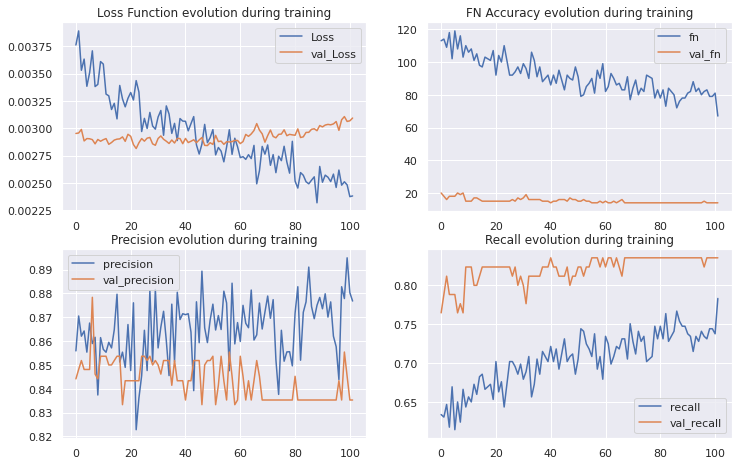

In [32]:
show_training(bias_fit)

Interesting, it did not improve out output and instead just moved our loss function to where it should be at the end of training but because of that our model did not improve much over the course of its training. It looks like this way of addressing the imbalanced data won't work for us, so lets try adjusting the weights for our classes instead.

**Class weights**

In [33]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# We can adjust this scale in the future if it goes too far one way or the other.

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0:.2f}')
print(f'Weight for class 1: {weight_for_1:.2f}')

Weight for class 0: 0.50
Weight for class 1: 289.44


In [34]:
weighted_model = build_model()

weighted_fit = weighted_model.fit(
    x_train, y_train,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    class_weight=class_weight)

Epoch 1/150
90/90 [==============================] - 2s 11ms/step - loss: 1.5896 - fn: 216.0000 - fp: 92175.0000 - tn: 146656.0000 - tp: 191.0000 - precision: 0.0021 - recall: 0.4693 - auc: 0.5537 - prc: 0.0256 - val_loss: 0.6815 - val_fn: 9.0000 - val_fp: 20166.0000 - val_tn: 25318.0000 - val_tp: 76.0000 - val_precision: 0.0038 - val_recall: 0.8941 - val_auc: 0.9055 - val_prc: 0.6550
Epoch 2/150
90/90 [==============================] - 1s 6ms/step - loss: 0.7131 - fn: 62.0000 - fp: 73331.0000 - tn: 108636.0000 - tp: 247.0000 - precision: 0.0034 - recall: 0.7994 - auc: 0.8027 - prc: 0.0819 - val_loss: 0.5748 - val_fn: 8.0000 - val_fp: 12478.0000 - val_tn: 33006.0000 - val_tp: 77.0000 - val_precision: 0.0061 - val_recall: 0.9059 - val_auc: 0.9346 - val_prc: 0.6574
Epoch 3/150
90/90 [==============================] - 1s 6ms/step - loss: 0.5278 - fn: 58.0000 - fp: 54642.0000 - tn: 127325.0000 - tp: 251.0000 - precision: 0.0046 - recall: 0.8123 - auc: 0.8591 - prc: 0.1192 - val_loss: 0.440

90/90 [==============================] - 1s 6ms/step - loss: 0.1819 - fn: 29.0000 - fp: 7868.0000 - tn: 174099.0000 - tp: 280.0000 - precision: 0.0344 - recall: 0.9061 - auc: 0.9780 - prc: 0.3246 - val_loss: 0.1149 - val_fn: 4.0000 - val_fp: 941.0000 - val_tn: 44543.0000 - val_tp: 81.0000 - val_precision: 0.0793 - val_recall: 0.9529 - val_auc: 0.9775 - val_prc: 0.6739
Epoch 23/150
90/90 [==============================] - 1s 6ms/step - loss: 0.2111 - fn: 36.0000 - fp: 8490.0000 - tn: 173477.0000 - tp: 273.0000 - precision: 0.0312 - recall: 0.8835 - auc: 0.9680 - prc: 0.2895 - val_loss: 0.1169 - val_fn: 4.0000 - val_fp: 990.0000 - val_tn: 44494.0000 - val_tp: 81.0000 - val_precision: 0.0756 - val_recall: 0.9529 - val_auc: 0.9772 - val_prc: 0.6338
Epoch 24/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1945 - fn: 36.0000 - fp: 7999.0000 - tn: 173968.0000 - tp: 273.0000 - precision: 0.0330 - recall: 0.8835 - auc: 0.9756 - prc: 0.2964 - val_loss: 0.1158 - val_fn: 4.0000 

90/90 [==============================] - 1s 6ms/step - loss: 0.1368 - fn: 23.0000 - fp: 7537.0000 - tn: 174430.0000 - tp: 286.0000 - precision: 0.0366 - recall: 0.9256 - auc: 0.9891 - prc: 0.3789 - val_loss: 0.0936 - val_fn: 4.0000 - val_fp: 1046.0000 - val_tn: 44438.0000 - val_tp: 81.0000 - val_precision: 0.0719 - val_recall: 0.9529 - val_auc: 0.9782 - val_prc: 0.7064
Epoch 44/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1387 - fn: 23.0000 - fp: 7146.0000 - tn: 174821.0000 - tp: 286.0000 - precision: 0.0385 - recall: 0.9256 - auc: 0.9885 - prc: 0.3909 - val_loss: 0.0925 - val_fn: 4.0000 - val_fp: 1009.0000 - val_tn: 44475.0000 - val_tp: 81.0000 - val_precision: 0.0743 - val_recall: 0.9529 - val_auc: 0.9783 - val_prc: 0.7059
Epoch 45/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1386 - fn: 22.0000 - fp: 6983.0000 - tn: 174984.0000 - tp: 287.0000 - precision: 0.0395 - recall: 0.9288 - auc: 0.9887 - prc: 0.3972 - val_loss: 0.0907 - val_fn: 4.000

90/90 [==============================] - 1s 6ms/step - loss: 0.1270 - fn: 22.0000 - fp: 6688.0000 - tn: 175279.0000 - tp: 287.0000 - precision: 0.0411 - recall: 0.9288 - auc: 0.9903 - prc: 0.4989 - val_loss: 0.0765 - val_fn: 5.0000 - val_fp: 914.0000 - val_tn: 44570.0000 - val_tp: 80.0000 - val_precision: 0.0805 - val_recall: 0.9412 - val_auc: 0.9767 - val_prc: 0.7151
Epoch 65/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1250 - fn: 21.0000 - fp: 6802.0000 - tn: 175165.0000 - tp: 288.0000 - precision: 0.0406 - recall: 0.9320 - auc: 0.9905 - prc: 0.4999 - val_loss: 0.0786 - val_fn: 4.0000 - val_fp: 1010.0000 - val_tn: 44474.0000 - val_tp: 81.0000 - val_precision: 0.0742 - val_recall: 0.9529 - val_auc: 0.9774 - val_prc: 0.7154
Epoch 66/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1254 - fn: 20.0000 - fp: 7287.0000 - tn: 174680.0000 - tp: 289.0000 - precision: 0.0381 - recall: 0.9353 - auc: 0.9900 - prc: 0.4866 - val_loss: 0.0789 - val_fn: 4.0000

90/90 [==============================] - 1s 6ms/step - loss: 0.1157 - fn: 22.0000 - fp: 6902.0000 - tn: 175065.0000 - tp: 287.0000 - precision: 0.0399 - recall: 0.9288 - auc: 0.9919 - prc: 0.5196 - val_loss: 0.0692 - val_fn: 4.0000 - val_fp: 1088.0000 - val_tn: 44396.0000 - val_tp: 81.0000 - val_precision: 0.0693 - val_recall: 0.9529 - val_auc: 0.9800 - val_prc: 0.7421
Epoch 86/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0919 - fn: 11.0000 - fp: 7226.0000 - tn: 174741.0000 - tp: 298.0000 - precision: 0.0396 - recall: 0.9644 - auc: 0.9956 - prc: 0.5180 - val_loss: 0.0677 - val_fn: 4.0000 - val_fp: 1052.0000 - val_tn: 44432.0000 - val_tp: 81.0000 - val_precision: 0.0715 - val_recall: 0.9529 - val_auc: 0.9791 - val_prc: 0.7353
Epoch 87/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1034 - fn: 14.0000 - fp: 6455.0000 - tn: 175512.0000 - tp: 295.0000 - precision: 0.0437 - recall: 0.9547 - auc: 0.9932 - prc: 0.5464 - val_loss: 0.0663 - val_fn: 4.000

90/90 [==============================] - 1s 6ms/step - loss: 0.0973 - fn: 14.0000 - fp: 6322.0000 - tn: 175645.0000 - tp: 295.0000 - precision: 0.0446 - recall: 0.9547 - auc: 0.9941 - prc: 0.5335 - val_loss: 0.0531 - val_fn: 4.0000 - val_fp: 798.0000 - val_tn: 44686.0000 - val_tp: 81.0000 - val_precision: 0.0922 - val_recall: 0.9529 - val_auc: 0.9745 - val_prc: 0.7633
Epoch 107/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0985 - fn: 16.0000 - fp: 6343.0000 - tn: 175624.0000 - tp: 293.0000 - precision: 0.0442 - recall: 0.9482 - auc: 0.9942 - prc: 0.5540 - val_loss: 0.0606 - val_fn: 4.0000 - val_fp: 1019.0000 - val_tn: 44465.0000 - val_tp: 81.0000 - val_precision: 0.0736 - val_recall: 0.9529 - val_auc: 0.9787 - val_prc: 0.7564
Epoch 108/150
90/90 [==============================] - 1s 6ms/step - loss: 0.1004 - fn: 13.0000 - fp: 6803.0000 - tn: 175164.0000 - tp: 296.0000 - precision: 0.0417 - recall: 0.9579 - auc: 0.9937 - prc: 0.5726 - val_loss: 0.0625 - val_fn: 4.00

90/90 [==============================] - 1s 6ms/step - loss: 0.0889 - fn: 12.0000 - fp: 6200.0000 - tn: 175767.0000 - tp: 297.0000 - precision: 0.0457 - recall: 0.9612 - auc: 0.9952 - prc: 0.5761 - val_loss: 0.0542 - val_fn: 4.0000 - val_fp: 1047.0000 - val_tn: 44437.0000 - val_tp: 81.0000 - val_precision: 0.0718 - val_recall: 0.9529 - val_auc: 0.9764 - val_prc: 0.7536
Epoch 128/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0827 - fn: 8.0000 - fp: 6208.0000 - tn: 175759.0000 - tp: 301.0000 - precision: 0.0462 - recall: 0.9741 - auc: 0.9958 - prc: 0.5855 - val_loss: 0.0474 - val_fn: 5.0000 - val_fp: 864.0000 - val_tn: 44620.0000 - val_tp: 80.0000 - val_precision: 0.0847 - val_recall: 0.9412 - val_auc: 0.9765 - val_prc: 0.7633
Epoch 129/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0767 - fn: 8.0000 - fp: 5833.0000 - tn: 176134.0000 - tp: 301.0000 - precision: 0.0491 - recall: 0.9741 - auc: 0.9964 - prc: 0.5801 - val_loss: 0.0437 - val_fn: 5.0000

90/90 [==============================] - 1s 6ms/step - loss: 0.0797 - fn: 9.0000 - fp: 6258.0000 - tn: 175709.0000 - tp: 300.0000 - precision: 0.0457 - recall: 0.9709 - auc: 0.9960 - prc: 0.5672 - val_loss: 0.0394 - val_fn: 5.0000 - val_fp: 705.0000 - val_tn: 44779.0000 - val_tp: 80.0000 - val_precision: 0.1019 - val_recall: 0.9412 - val_auc: 0.9775 - val_prc: 0.7643
Epoch 149/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0780 - fn: 11.0000 - fp: 6097.0000 - tn: 175870.0000 - tp: 298.0000 - precision: 0.0466 - recall: 0.9644 - auc: 0.9962 - prc: 0.6075 - val_loss: 0.0446 - val_fn: 5.0000 - val_fp: 865.0000 - val_tn: 44619.0000 - val_tp: 80.0000 - val_precision: 0.0847 - val_recall: 0.9412 - val_auc: 0.9772 - val_prc: 0.7617
Epoch 150/150
90/90 [==============================] - 1s 6ms/step - loss: 0.0805 - fn: 11.0000 - fp: 6326.0000 - tn: 175641.0000 - tp: 298.0000 - precision: 0.0450 - recall: 0.9644 - auc: 0.9959 - prc: 0.5421 - val_loss: 0.0490 - val_fn: 5.0000

In [35]:
show_score(weighted_model)

1781/1781 [==============================] - 1s 657us/step

Training Metrics
loss : 0.0490
fn : 5.0000
fp : 4909.0000
tn : 222542.0000
tp : 389.0000
precision : 0.0734
recall : 0.9873
auc : 0.9945
prc : 0.7680

Training Confusion Matrix
[[222542   4909]
 [     5    389]]

Training Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.07      0.99      0.14       394

    accuracy                           0.98    227845
   macro avg       0.54      0.98      0.56    227845
weighted avg       1.00      0.98      0.99    227845


Test Metrics
loss : 0.0497
fn : 8.0000
fp : 1226.0000
tn : 55638.0000
tp : 90.0000
precision : 0.0684
recall : 0.9184
auc : 0.9711
prc : 0.7336

Test Confusion Matrix
[[55638  1226]
 [    8    90]]

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92

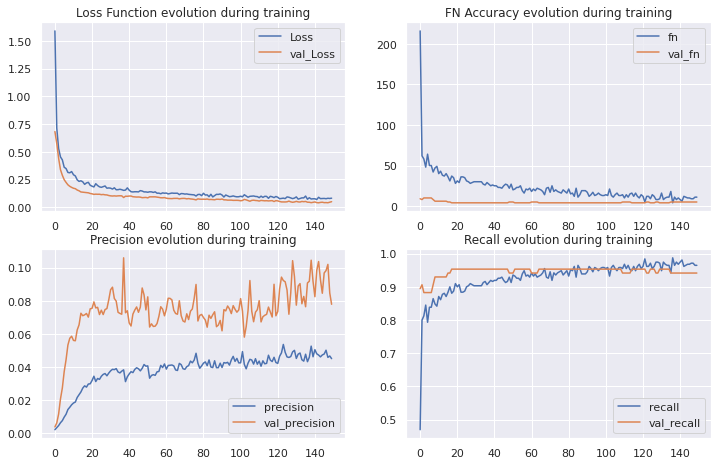

In [36]:
show_training(weighted_fit)

We are deviating from the standard metrics here, but for this imbalanced sample I would think that we want to optimize for our false negative minimum. This means even if we end up with a lot more false positives it is worth it to point of the weights on the two classes. Our first attempt definitely had the better metrics, but as soon as we added class weight we were able to get the number of false negatives in test data down to the single digits.

## Conclusion

After going through three implementations of our ANN we can see the significant differences that occur depending on how we handle the imbalance of our data. There is definitely a balance that needs to be struck for this particular type of model, because the cost of a false positive vs. false negative in a heavily imbalanced dataset means that we may be willing to have more on one than the other. Defining that boundary is important and in our third model I did just that with class weights, under the assumption that there would be some scale for accepting more false postives to avoid more false negatives. Although our generic first ANN without any correction had the best looking metrics, our class weighted model had less than ten total false negatives at the cost of more than one thousand false positives. If this were something that we were looking to implement in a production system and a false positive would shut off access to a persons account that they would have to go through a process to remedy then this would be clearly inferior. We don't have that information for this, so I will leave it as is, but thought that optimizing this a few different ways due to the imbalances of the dataset was worthwhile.

## References

1. Team, K. (n.d.). Keras documentation: Keras API reference. Retrieved June 5, 2022, from https://keras.io/api/
2. 💳credit card fraud💸detection🚨anns vs xgboost. (n.d.). Retrieved June 5, 2022, from https://kaggle.com/faressayah/credit-card-fraud-detection-anns-vs-xgboost